# 언어 모델이 미지의 데이터를 처리할 수 있게 하려면

## 모르는 정보에 기반한 답변을 할 수 있는 구조
- GPT와 같은 언어모델은, 학습하지 않은 내용에 대해서는 답변을 할 수 없다
- RAG(Retrieval-Augmented Generation)
    - 사용자가 입력한 내용과 관련된 정보를 외부 데이터베이스 등에서 검색하고
    - 그 정보를 이용해 프롬프트를 만들ㅇ러 언어 모델을 호출
    - 학습하지 않은 지식이나 정보로 답변 가능

## 답변에 필요한 문장을 찾는 방법이 중요
- RAG에서는 답변에 필요한 문장을 어떻게 검색하고 가져오는지 중요
- 웹이나 PDF의 자료를 벡터화 하여, 질문과 유사한 내용을 찾아 내야 한다

## 유사 문장 겁색을 위해 필요한 벡터화란?

- RAG에서는 준비된 문장에서 질문과 유사한 부분을 찾아내 프롬프트를 생성한다
- 텍스트를 벡터화 하여, 유사한 내용이 거리가 가까워지도록 표현 할 수 있다.

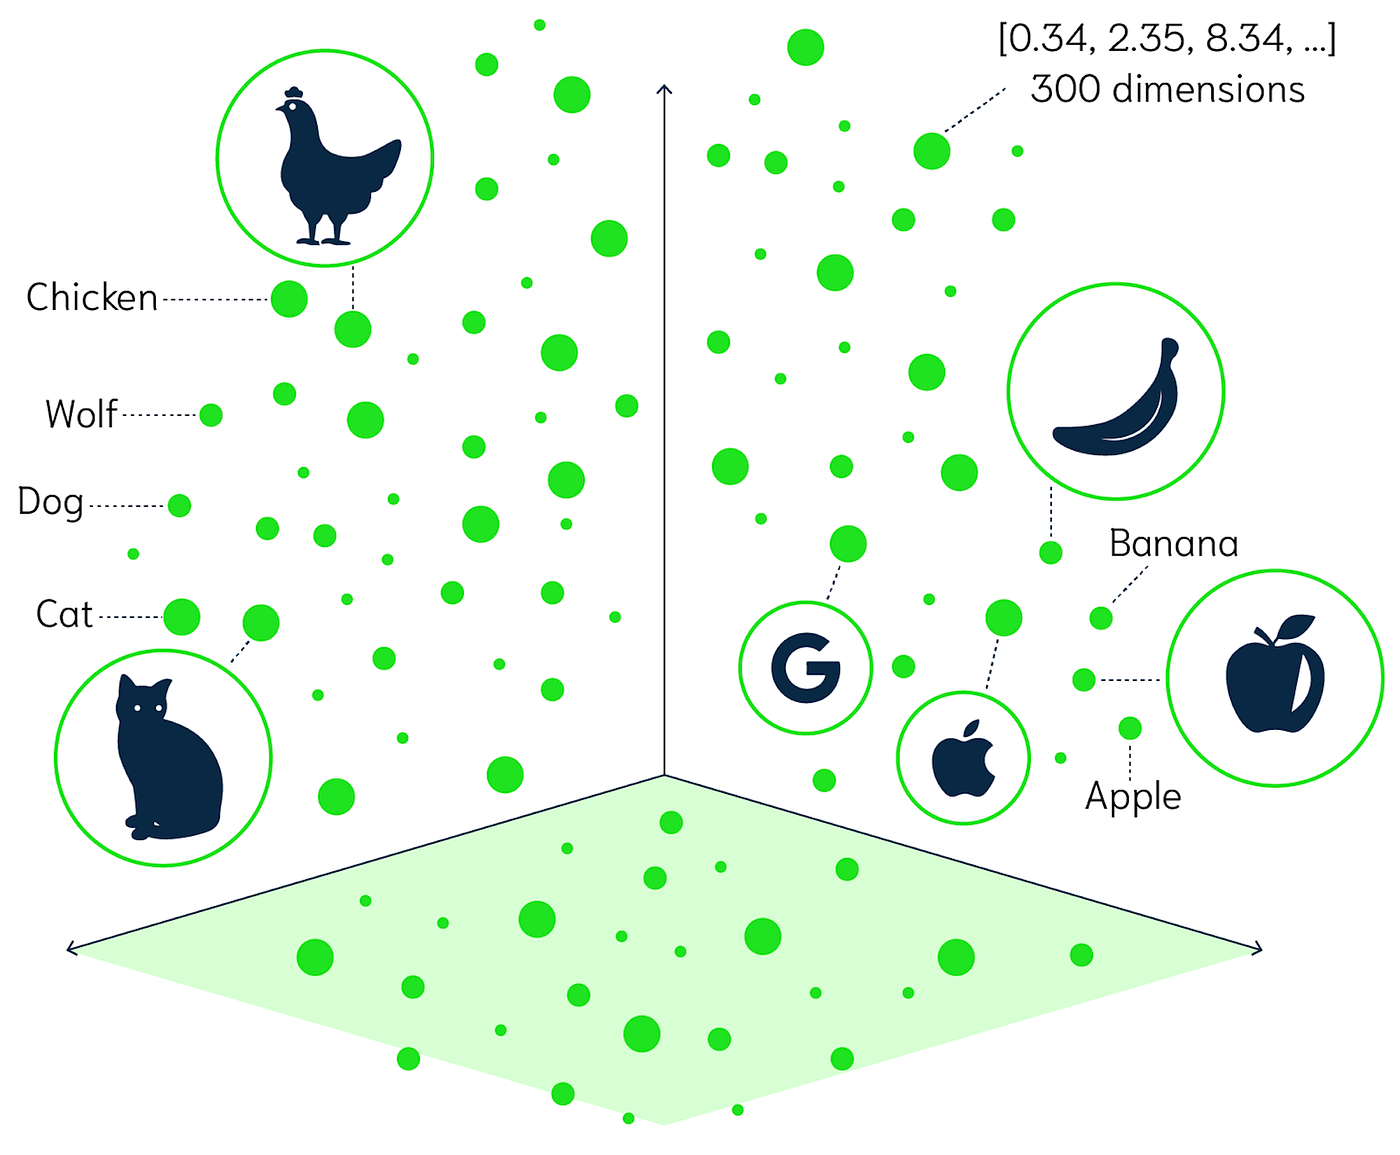

## 언어 모델을 사용해 텍스트를 벡터화하기
텍스트를 벡터화하고 비슷한 내용을 근접하게 배열하는 방법은 다양하며, 최근 몇 년간 이 분야의 발전이 매우 빠르게 진행되었습니다. 여러 API와 모델 라이브러리를 통해 이를 수행할 수 있습니다. 여기에 몇 가지 대표적인 방법을 소개합니다:

1. **OpenAI의 GPT 모델들**:
   - OpenAI의 API는 GPT-3 및 GPT-4와 같은 강력한 언어 모델을 제공합니다. 이 모델들은 문맥적 의미를 이해하고, 텍스트를 고차원의 벡터 공간으로 인코딩하는 능력이 뛰어납니다. 이렇게 인코딩된 벡터들은 클러스터링이나 유사도 측정 등에 사용될 수 있습니다.
   - 본 교재에서는 'text-embedding-ada-002'를 사용해 텍스트를 벡터화 합니다.

2. **Hugging Face의 Transformer 모델들**:
   - Hugging Face는 다양한 NLP 작업에 사용할 수 있는 수많은 사전 훈련된 모델을 제공하는 플랫폼입니다. 여기에는 BERT, RoBERTa, DistilBERT 등이 포함되어 있으며, 이 모델들은 텍스트를 벡터로 변환하고 유사도를 계산하는 데 사용할 수 있습니다.

3. **Sentence Transformers**:
   - Sentence Transformers는 특히 문장 수준에서의 벡터화에 최적화된 모델을 제공합니다. 이 모델들은 BERT나 RoBERTa와 같은 기존의 Transformer 모델을 기반으로 하여, 문장의 의미를 더 잘 포착하여 유사한 문장들이 벡터 공간에서 서로 가까이 위치하도록 합니다.

4. **Universal Sentence Encoder (USE)**:
   - Google에서 개발한 Universal Sentence Encoder는 다양한 언어의 문장을 효율적으로 벡터화할 수 있습니다. 이 모델은 뛰어난 성능을 제공하며, 간단한 텍스트 유사도 계산부터 복잡한 NLP 작업에 이르기까지 다양하게 활용됩니다.

5. **FastText**:
   - Facebook에서 개발한 FastText는 단어를 벡터로 변환하는 데 사용됩니다. 이 모델은 특히 단어 내의 서브워드(subword) 정보를 활용하여 비슷한 단어가 벡터 공간에서 비슷한 위치를 가지도록 합니다.

이러한 모델들을 통해 텍스트 데이터를 벡터화하고, 이를 기반으로 클러스터링, 유사도 계산, 추천 시스템 구축 등 다양한 응용 프로그램을 개발할 수 있습니다. 각각의 모델과 플랫폼은 그 특성과 용도에 따라 다른 장단점을 가지고 있으므로, 구체적인 목적과 요구 사항에 맞는 선택이 중요합니다.

## 벡터 유사도 검색
- 'text-embedding-ada-002'를 사용해 텍스트를 벡터화 후 유사도를 비교 합니다.

In [1]:
from langchain.embeddings import OpenAIEmbeddings
from numpy import dot
from numpy.linalg import norm

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


### 벡터화 하기

In [2]:
query_vector = embeddings.embed_query("비행 자동차의 최고 속도는?")

print(f'벡터화된 질문: {query_vector[:10]}')

벡터화된 질문: [-0.011089965681877331, -0.015286693322979184, 0.014691780295829944, -0.0299784745501317, -0.025658883109909277, -5.385342583153723e-05, -0.03572068357235477, -0.01205346731242057, -0.03184081235968443, -0.01723956313720819]


In [5]:
len(query_vector)

1536

In [6]:
query_vector

[-0.011089965681877331,
 -0.015286693322979184,
 0.014691780295829944,
 -0.0299784745501317,
 -0.025658883109909277,
 -5.385342583153723e-05,
 -0.03572068357235477,
 -0.01205346731242057,
 -0.03184081235968443,
 -0.01723956313720819,
 -0.021067703106238615,
 0.033780746103374455,
 -0.0076304138505796145,
 -0.01672224697551881,
 0.015377224396332883,
 0.0045523825022633,
 0.01217633018021857,
 -0.0141615308575693,
 0.0013013735856651637,
 -0.005910337426697917,
 0.01467884701925868,
 -0.008225327343390142,
 -0.012370323740852087,
 -0.011135230752892895,
 0.004390721201735369,
 0.02051158804615802,
 0.005137596270476023,
 -0.008975435964104255,
 0.0302888638746163,
 -0.007190695020011386,
 0.055973611675022954,
 -0.008108931579539062,
 -0.02052452039140671,
 0.00401243380506614,
 -0.006893238506436765,
 -0.020912507512673744,
 -0.0006341164687831064,
 -0.022115267774866065,
 0.0172912943808481,
 -0.0007602123064779566,
 0.01652825248356272,
 0.016942106157972283,
 -0.007151896587281455,


### 벡터 유사도 계산하기

In [9]:
document_1_vector = embeddings.embed_query("비행 자동차의 최고 속도는 시속 150km입니다.") #← 문서 1의 벡터를 얻음
document_2_vector = embeddings.embed_query("닭고기를 적당히 양념한 후 중불로 굽다가 가끔 뒤집어 주면서 겉은 고소하고 속은 부드럽게 익힌다.") #← 문서 2의 벡터를 얻음

cos_sim_1 = dot(query_vector, document_1_vector) / (norm(query_vector) * norm(document_1_vector)) #← 벡터의 유사도를 계산
print(f"문서 1과 질문의 유사도: {cos_sim_1}")
cos_sim_2 = dot(query_vector, document_2_vector) / (norm(query_vector) * norm(document_2_vector)) #← 벡터의 유사도를 계산
print(f"문서 2와 질문의 유사도: {cos_sim_2}")

문서 1과 질문의 유사도: 0.9328189981087923
문서 2와 질문의 유사도: 0.7339814092406828


- 문서1이 질문과 더 높은 유사도를 보이는 것을 알 수 있다.
- 0에서 1사이의 값으로, 1일 수록 더 큰 유사도

<img src="https://images.prismic.io/encord/115a0a06-0131-4f0b-bfcf-efa9bbd3b703_Google%27s+Vector+search+technology.png?auto=compress,format">

## 벡터 유사도 검색에서 RAG를 통합하는 구체적인 절차

### 사전 준비
- 정보원이 되는 문서에서 데이터베이스를 만들어 질문을 검색 할 수 있게 한다.

### 검색 및 프롬프트 구축
- 사용자 처리를 받아들였을 때 하는 처리가 검색과 프롬프트 구축
- 데이터베이스에서 질문과 유사한 벡터를 검색해 정보원이 될 문장을 여러개 획득 한다
- 이를 조합해 프롬프트를 만든다

## 사전 준비

### 1. 텍스트 추출(Document loaders)
- RAG에서 사용하는 기반 정보는 일반적으로 텍스트이다.
- PDF나 웹등 다양한 소스로 부터 데이터를 불러 온다

### 2. 텍스트 분할(Text spliters)
- 모델에 입력 가능한 토큰 크기로 잘라 준다
- Text Spliters가 적절한 최대 토큰 사이즈에 맞춰 문장을 잘라준다.

### 3.텍스트 벡터화(Text embedding models)
- 가까운 문장을 검색하게 할 수 있도록 텍스트를 벡터화 한다.
- OpenAIEmbeddings, LlamaCppEmbeddings 등이 있다.

### 4.텍스트와 벡터를 데이터베이스에 저장(Vector stores)
- 텍스트를 벡터화 한 것을 벡터 데이터베이스에 저장 한다.
- Pinecone, Chroma, Faiss 등이 있다.

## 검색 및 프롬프트 구축

### 1.사용자의 입력을 벡터화(Text embedding models)
- 의미적으로 가까운 문장은 가까운 벡터가 된다
- 이렇게 사용하기 위해, 사용자의 질문을 벡터화 한다

### 2. 사용자 입력의 벡터를 미리 준비된 데이터베이스에서 검색해 문장 가져오기(Vector stores)
- 사전에 준비된 벡터DB에서 사용자 질문과 유사한 텍스트를 여러개 가지고 온다

### 3.획득한 유사 문장과 질문을 조합해 프롬프트 작성
- PromptTemplate를 사용 유사 문장과 질문을 조합 한다.

### 4.생성한 프롬프트를 사용해 언어 모델 호출(Language models)
- chat models에 생성한 프롬프트를 적용하여 호출 한다.

# 주어진 PDF를 기반으로 답변하는 챗봇 만들기

## PDF에서 문장 불러오기
- PyMuPDFLoader를 사용 PDF에서 텍스트를 읽어 드릴 준비를 한다.
```
!pip install pymupdf
```

In [9]:
from langchain.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader('/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf')
documents = loader.load() # Document 클래스로 반환

In [10]:
print(f"문서 개수: {len(documents)}") #← 문서 개수 확인, 1페이지 당 1개의 문장
print(f"첫 번째 문서의 내용: {documents[0].page_content}") #← 첫 번째 문서의 내용을 확인
print(f"첫 번째 문서의 메타데이터: {documents[0].metadata}") #← 첫 번째 문서의 메타데이터를 확인

문서 개수: 12
첫 번째 문서의 내용: 하늘을 나는 자동차 관련 
법제도
주의】이 글은 가상의 비행 자동차를 대상으로 한 법률 자동 생성 예시입니다.

첫 번째 문서의 메타데이터: {'source': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'file_path': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'page': 0, 'total_pages': 12, 'format': 'PDF 1.7', 'title': '하늘을 나는 자동차 관련 법제도', 'author': '', 'subject': '', 'keywords': ', docId:825DD61FFAE9658C7293B36CB13F138C', 'creator': 'Microsoft Office Word', 'producer': 'Aspose.Words for .NET 23.11.0', 'creationDate': 'D:20231207125109Z', 'modDate': "D:20231211174122+09'00'", 'trapped': ''}


## 문장 나우기
- 모델에 넣을 수 있는 토큰 사이즈로 자른다.
- spaCy를 활용하여 문장을 자른다
    - 파이썬으로 개발된 자연어 처리 라이브러리
    - 문장 분할, 품사 판단, 명사구 추출, 구문 분석 등 다양한 언어 분석 기능 제공
```python
!pip install spacy
!python3 -m spacy download ko_core_news_sm # 한국어에 대응하는 데이터 다운로드
``` 

In [11]:
from langchain.text_splitter import SpacyTextSplitter

text_splitter = SpacyTextSplitter(
    chunk_size=300, # 분할할 크기 설정
    pipeline='ko_core_news_sm' # 분할에 사용할 언어 모델 설정
)

splitted_documents = text_splitter.split_documents(documents)

In [12]:
print(f"분할 전 문서 개수: {len(documents)}")
print(f"분할 후 문서 개수: {len(splitted_documents)}")

분할 전 문서 개수: 12
분할 후 문서 개수: 70


## 분할된 문장을 벡터화해 데이터베이스에 저장한다
- OpenAI의 임베딩을 사용하기 위해 tiktoken을 설치 한다.
```python
!pip install tiktoken
```
- 벡터 DB로 chroma를 사용하기 위해 설치 한다.
```python
!pip install chromadb
```

In [15]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

embeddings = OpenAIEmbeddings(
    model='text-embedding-ada-002'
)

database = Chroma(
    persist_directory='/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data', # db 저장 위치
    embedding_function=embeddings # 벡터화에 사용할 모델 설정
)

database.add_documents(
    splitted_documents, # 추가할 문서 입력
)

['f14f3c6d-9cb8-4101-88ff-d0aec527de32',
 '1ba32339-6aa9-4df9-b787-b8f93d3b780a',
 'bc50b745-19b9-429a-ac9c-c3a2c9b3e4f2',
 '11fe193f-ae47-40f8-9d57-24cfbf28e0c5',
 '4aaad56a-a130-48d2-a349-c0f5067b89fb',
 '2d422f97-a5aa-483e-a1b9-918c04958318',
 '9e4a002a-a43b-4bb1-bfff-4e2e230a7b95',
 '3a4a4cb7-867e-4b38-a13a-e3775b0bdab2',
 'd02dfdda-eccf-4536-8f32-d1ebcaa4d2df',
 '43f063ee-7b64-43dd-aa74-15a392518c40',
 '67272c3d-96e1-4411-a4a9-cbc0bf81126f',
 'c0a1d8ef-875d-4cf7-8220-e63cb6fb6a97',
 '659d6c96-ca6c-43c0-b49b-566808e6144a',
 'c344676e-a760-49b3-9386-de30020f9205',
 '127457f9-8b59-4474-86e4-2b7dd6bf9060',
 'dc36a364-a4a9-4b2c-b503-f864217b94e9',
 '8abc04b4-0498-4b8c-a276-d64882da11c0',
 '62360332-5424-4baa-9d2c-6456c1aae8bf',
 '96865e97-2e76-4686-8e66-78ee203e27e3',
 'b513f0ab-0b86-40f2-b2b0-f85ee0384ac0',
 '327dc917-1e65-402e-979a-2a7ae7578359',
 'b369fc73-db3d-40c7-bdb0-61262a348c37',
 '6430e39a-4d0f-4e6e-a817-09b394c48b37',
 'e6461850-a891-4603-811a-07e5ef9ca203',
 'ed7f6cb8-be82-

## 벡터 데이터베이스에서 검색 실행하기

In [14]:
documents = database.similarity_search("비행 자동차의 최고 속도는?") #← 데이터베이스에서 유사도가 높은 문서를 가져옴
print(f"문서 개수: {len(documents)}") #← 문서 개수 표시

for document in documents:
    print('='*50)
    print(f"문서 내용: {document.page_content}") #← 문서 내용을 표시

문서 개수: 4
문서 내용: 제2조(정의)
이 법에서 "비행자동차"라 함은 지상 및 공중을 이동할 수 있는 능력을 가진 차량을 말한다. 


제3조(일반적 속도제한)


1.
도심에서 비행 자동차가 비행하는 경우 최대 속도는 시속 150km로 한다.


2.

도시 외의 지역에서 비행 자동차가 비행하는 경우 최대 속도는 시속 250km로 한다.


3.

특정 지역이나 시설 상공 또는 특정 비행 코스에서는 별도의 속도 제한이 설정될 수 있다.


제4조 (특례 속도 제한)
1.
문서 내용: 비행 자동차 속도 제한법
제1조(목적)
이 법은 비행자동차의 비행 안전 및 일반 대중의 이익을 보장하기 위해 비행자동차의 비행 속도에 관한 
기준을 규정하는 것을 목적으로 한다.


제2조(정의)
이 법에서 "비행자동차"라 함은 지상 및 공중을 이동할 수 있는 능력을 가진 차량을 말한다. 


제3조(일반적 속도제한)


1.
도심에서 비행 자동차가 비행하는 경우 최대 속도는 시속 150km로 한다.


2.

도시 외의 지역에서 비행 자동차가 비행하는 경우 최대 속도는 시속 250km로 한다.


3.
문서 내용: 제3조(일반적 속도제한)


1.
도심에서 비행 자동차가 비행하는 경우 최대 속도는 시속 150km로 한다.


2.

도시 외의 지역에서 비행 자동차가 비행하는 경우 최대 속도는 시속 250km로 한다.


3.

특정 지역이나 시설 상공 또는 특정 비행 코스에서는 별도의 속도 제한이 설정될 수 있다.


제4조 (특례 속도 제한)
1.

긴급차량, 공공기관 차량 및 관련 공적 임무를 수행하는 차량에 대해서는 제3조의 제한 속도를 초
과하여 비행할 수 있도록 허용한다.


2.
문서 내용: 비행 자동차 고도 제한법
제1조(목적)
이 법은 비행자동차의 비행안전 및 주민의 안전을 확보하기 위하여 비행자동차의 비행 고도 제한에 관한 
기준을 정함을 목적으로 한다.


제2조(정의)
이 법에서 "비행자동차"라 함은 지상 및 공중을 이동할 수 있는 능력을 가진 차량을 

## 검색 결과와 질문을 조합해 질문에 답하게 한다

In [22]:
from langchain.chat_models import ChatOpenAI  #← ChatOpenAI 가져오기
from langchain.prompts import PromptTemplate  #← PromptTemplate 가져오기
from langchain.schema import HumanMessage  #← HumanMessage 가져오기

# query = "비행 자동차의 최고 속도는?"
query = '비행기 정비는 어떻게 해?'
documents = database.similarity_search(query)

print(documents)

documents_string = "" # 문서 내용을 저장할 변수 

for document in documents:
    documents_string += f"""
---------------------------
{document.page_content}
""" #← 문서 내용을 추가

prompt = PromptTemplate( #← PromptTemplate를 초기화
    template="""문장을 바탕으로 질문에 답하세요.

문장: 
{document}

질문: {query}
""",
    input_variables=["document","query"] #← 입력 변수를 지정
)

chat = ChatOpenAI( #← ChatOpenAI를 초기화
    model="gpt-3.5-turbo"
)

result = chat.invoke([
    HumanMessage(content=prompt.format(document=documents_string, query=query))
])

print(result.content)

[Document(page_content='비행 차량에서 비상 탈출 시스템\n2.\n\n비상시 자동 하강 시스템\n3.\n\n비상 연락 시스템\n2.\n\n피난 수단의 구체적인 요건은 교통 관리 기관이 정한 기준에 따라 정해진다.\n\n\n제5조 (승무원 교육)\n비행차 운전자는 비상사태에 대응할 수 있는 적절한 훈련을 받고 정기적으로 그 능력을 증명해야 한다.\n\n\n제6조(피난수단 위반에 대한 처벌)\n1.\n\n이 법을 위반하여 적절한 피난 수단을 갖추지 않은 비행기를 운행한 자는 300만 원 이하의 벌금에 \n처한다.\n\n\n2.', metadata={'author': '', 'creationDate': 'D:20231207125109Z', 'creator': 'Microsoft Office Word', 'file_path': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'format': 'PDF 1.7', 'keywords': ', docId:825DD61FFAE9658C7293B36CB13F138C', 'modDate': "D:20231211174122+09'00'", 'page': 6, 'producer': 'Aspose.Words for .NET 23.11.0', 'source': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'subject': '', 'title': '하늘을 나는 자동차 관련 법제도', 'total_pages': 12, 'trapped': ''}), Document(page_content='2.\n\n비행 차량 운전자는 특히 야간이나 주택가를 지날 때 소음을 최소화하기 위한 조작을 해야 한다.\n\n\n제4조(소음 규제 위반에 대한 처벌)\n1.\n\n\n이 법을 위반하여 규정 이상의 소음을 발생시키는 비행체를 제조 또는 운행한

## 채팅 화면 만들기
- chainlit 이라는 라이브러리를 사용 프론트엔드 만들어 보자
```python
!pip install chainlit
```

```python

import chainlit as cl


@cl.on_chat_start #← 채팅이 시작될 때 실행할 함수를 정의
async def on_chat_start():
    await cl.Message(content="준비되었습니다! 메시지를 입력하세요!").send() #← 초기에 표시할 메시지를 보냄

@cl.on_message #← 메시지를 보낼 때 실행할 함수를 정의
async def on_message(input_message):
    print("입력된 메시지: " + input_message.content)
    await cl.Message(content="안녕하세요!").send() #← 챗봇의 답변을 보냄

```
위와 같이 ch03_chat_1.py를 만들고 다음 명령어로 실행한다
> chainlit run ch03_chat_1.py

## 채팅 화면에서 질문을 입력할 수 있게 하기
```python
import chainlit as cl
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain.vectorstores import Chroma

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)

chat = ChatOpenAI(model="gpt-3.5-turbo")

prompt = PromptTemplate(template="""문장을 바탕으로 질문에 답하세요.

문장: 
{document}

질문: {query}
""", input_variables=["document", "query"])

database = Chroma(
    persist_directory="./data", 
    embedding_function=embeddings
)

@cl.on_chat_start
async def on_chat_start():
    await cl.Message(content="준비되었습니다! 메시지를 입력하세요!").send()

@cl.on_message
async def on_message(input_message):
    print("입력된 메시지: " + input_message.content)
    documents = database.similarity_search(input_message.content) #← input_message로 변경

    documents_string = ""

    for document in documents:
        documents_string += f"""
    ---------------------------
    {document.page_content}
    """

    result = chat([
        HumanMessage(content=prompt.format(document=documents_string,
                                           query=input_message)) #← input_message로 변경
    ])
    await cl.Message(content=result.content).send() #← 챗봇의 답변을 보냄

```

## 채팅 시작 시 파일 업로드 기능
- PDF 파일을 업로드 하여 사용할 수 있게 한다.

```python
import os
import chainlit as cl
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyMuPDFLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain.text_splitter import SpacyTextSplitter
from langchain.vectorstores import Chroma


embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)

chat = ChatOpenAI(model="gpt-3.5-turbo")

prompt = PromptTemplate(template="""문장을 기반으로 질문에 답하세요. 

문장: 
{document}

질문: {query}
""", input_variables=["document", "query"])

text_splitter = SpacyTextSplitter(chunk_size=300, pipeline="ko_core_news_sm")

@cl.on_chat_start
async def on_chat_start():
    files = None #← 파일이 선택되어 있는지 확인하는 변수

    while files is None: #← 파일이 선택될 때까지 반복
        files = await cl.AskFileMessage(
            max_size_mb=20,
            content="PDF를 선택해 주세요",
            accept=["application/pdf"],
            raise_on_timeout=False,
        ).send()
    file = files[0]

    if not os.path.exists("./data"): #← tmp 디렉터리가 존재하는지 확인
        os.mkdir("./data") #← 존재하지 않으면 생성
    # 파일 경로를 사용하여 파일 열기
    with open(file.path, 'rb') as file_to_read:
        file_data = file_to_read.read()  # 파일 내용 읽기

    # 읽은 데이터를 다른 파일에 쓰기
    with open(f"./data/{file.name}", 'wb') as f:
        f.write(file_data)        
    # with open(f"data/{file.name}", "wb") as f: #← PDF 파일을 저장
    #     f.write(file.content) #← 파일 내용을 작성

    documents = PyMuPDFLoader(f"./data/{file.name}").load() #← 저장한 PDF 파일을 로드
    splitted_documents = text_splitter.split_documents(documents) #← 문서를 분할

    database = Chroma( #← 데이터베이스 초기화
        embedding_function=embeddings,
        # 이번에는 persist_directory를 지정하지 않음으로써 데이터베이스 영속화를 하지 않음
    )

    database.add_documents(splitted_documents) #← 문서를 데이터베이스에 추가

    cl.user_session.set(  #← 데이터베이스를 세션에 저장
        "database",  #← 세션에 저장할 이름
        database  #← 세션에 저장할 값
    )

    await cl.Message(content=f"`{file.name}` 로딩이 완료되었습니다. 질문을 입력하세요.").send() #← 불러오기 완료를 알림

@cl.on_message
async def on_message(input_message):
    print("입력된 메시지: " + input_message.content)

    database = cl.user_session.get("database") #← 세션에서 데이터베이스를 가져옴

    documents = database.similarity_search(input_message.content)

    documents_string = ""

    for document in documents:
        documents_string += f"""
    ---------------------------
    {document.page_content}
    """
    
    result = chat([
        HumanMessage(content=prompt.format(document=documents_string,
                                           query=input_message.content)) #← input_message로 변경
    ])
    await cl.Message(content=result.content).send()


```

# RetrievalQA로 QA 시스템 구축이 쉬워진다

## RetrievalQA란?
- 앞서 설명한 RAG 기반 QA를 더욱 쉽게 하기 위한 모듈
- RAG 구현시 공통되는 부분은 제외하고, 다른 부분에만 집중 할 수 있게 한다
- 장점
    - 검색, 프롬프트 구축, 언어 모델 호출 처리의 구현을 단순화
    - 준비된 Retrievers를 사용 손쉽게 구현

## RetrievalQA로 코드를 간단하게

In [16]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI  #← ChatOpenAI 가져오기
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

chat = ChatOpenAI(
    model='gpt-3.5-turbo'
)

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)

database = Chroma(
    persist_directory="/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data", 
    embedding_function=embeddings
)

retriever = database.as_retriever() # 데이터베이스를 Retriver로 변환

qa = RetrievalQA.from_llm(
    llm=chat,
    retriever=retriever,
    return_source_documents=True # 응답에 원본 문서를 포함 여부
)

result = qa('비행 자동차의 최고 속도를 알려주세요.')
print(result['result'])
print(result['source_documents'])

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(
/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


도심에서 비행 자동차가 비행하는 경우 최대 속도는 시속 150km이며, 도시 외의 지역에서 비행 자동차가 비행하는 경우 최대 속도는 시속 250km입니다.
[Document(page_content='비행 자동차 속도 제한법\n제1조(목적)\n이 법은 비행자동차의 비행 안전 및 일반 대중의 이익을 보장하기 위해 비행자동차의 비행 속도에 관한 \n기준을 규정하는 것을 목적으로 한다.\n\n\n제2조(정의)\n이 법에서 "비행자동차"라 함은 지상 및 공중을 이동할 수 있는 능력을 가진 차량을 말한다. \n\n\n제3조(일반적 속도제한)\n\n\n1.\n도심에서 비행 자동차가 비행하는 경우 최대 속도는 시속 150km로 한다.\n\n\n2.\n\n도시 외의 지역에서 비행 자동차가 비행하는 경우 최대 속도는 시속 250km로 한다.\n\n\n3.', metadata={'author': '', 'creationDate': 'D:20231207125109Z', 'creator': 'Microsoft Office Word', 'file_path': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'format': 'PDF 1.7', 'keywords': ', docId:825DD61FFAE9658C7293B36CB13F138C', 'modDate': "D:20231211174122+09'00'", 'page': 3, 'producer': 'Aspose.Words for .NET 23.11.0', 'source': '/home/restful3/workspaces/study/ds4th_study/source/랭체인_완벽_입문/.data/sample.pdf', 'subject': '', 'title': '하늘을 나는 자동차 관련 법제도', 'total_pages': 12, 'trapped': ''}), Document(page_content='제2조(정의)\n이 법에서 "비행자동차"라

### RetrievalQA 사용의 또 다른 장점
- 출처가 되는 문장의 작성 방법을 다양하게 설정 할 수 있다.
- Map reduce
    - 각 문장에 대해 LLM  체인을 개별적으로 적용
    - 그 출력을 새로운 문장으로 작성, 결합, 체인에 전달, 단일 출력 생성
- Refine
    - 모든 문장에 순서대로 접근, 각각의 문장을 평가, 반복적으로 답을 업데이트
- Map re-rank
    - 각 문장에 대해 초기 프롬프트 실행 및 테스트
    - 답에 대한 확신도로 점수화, 정렬, 가장 높은 신뢰도의 답변만 사용
 
<img src="https://miro.medium.com/v2/resize:fit:774/1*7ckxhncDo5lcu-H8sAmrLw.png">  

# 준비된 Retrievers를 사용해 위키백과를 정보원으로 활용

## Retrievers는 문서를 검색하는 기능 세트
```python
!pip install wikipedia
```

In [33]:
from langchain.retrievers import WikipediaRetriever

retriever = WikipediaRetriever(  #← WikipediaRetriever를 초기화
    lang="ko",  #← Wikipedia의 언어를 지정
)
documents = retriever.get_relevant_documents( #← Wikipedia에서 관련 문서를 가져옴
    "대형 언어 모델" #← 검색할 키워드를 지정
)

print(f"검색 결과: {len(documents)}건") #← 검색 결과 건수를 표시

for document in documents:
    print("---------------검색한 메타데이터---------------")
    print(document.metadata) #← 메타데이터를 표시
    print("---------------검색한 텍스트---------------")
    print(document.page_content[:100]) #← 텍스트의 첫 100글자를 표시

검색 결과: 3건
---------------검색한 메타데이터---------------
{'title': '대형 언어 모델', 'summary': '대형 언어 모델(Large language model, LLM) 또는 거대 언어 모델은 수많은 파라미터(보통 수십억 웨이트 이상)를 보유한 인공 신경망으로 구성되는 언어 모델이다. 자기 지도 학습이나 반자기지도학습을 사용하여 레이블링되지 않은 상당한 양의 텍스트로 훈련된다. LLM은 2018년 즈음에 모습을 드러냈으며 다양한 작업을 위해 수행된다. 이전의 특정 작업의 특수한 지도 학습 모델의 훈련 패러다임에서 벗어나 자연어 처리 연구로 초점이 옮겨졌다.\n대규모 언어 모델(LLM) 은 AI 챗봇 기술을 가능하게 하는 요소이며 많은 화제를 불러일으키고 있는 주제 중 하나다. 대규모 언어 모델(LLM)의 작동 방식은 크게 3가지로 나뉘고 있다. 토큰화, 트랜스포머 모델, 프롬프트 등. 토큰화는 자연어 처리의 일부로 일반 인간 언어를 저수준 기계 시스템(LLMS)가 이해할 수 있는 시퀀스로 변환하는 작업을 말하며 여기에는 섹션에 숫자 값을 할당하고 빠른 분석을 위해 인코딩하는 작업이 수반된다. 이는 음성학의 AI 버전과 같으며 토큰화의 목적은 인공지능이 문장의 구조를 예측하기 위한 학습 가이드 또는 공식과 같은 컨텍스트 백터를 생성하는 것이 목적. 언어를 더 많이 연구하고 문장이 어떻게 구성되는지 이해할수록 특정 유형의 문장에서 다음 언어에 대한 예측이 더 정확 해진다. 이로 인해 온라인에서 사람들이 사용하는 다양한 커뮤니케이션 스타일을 재현하는 모델을 개발할 수 있다.\n트랜스포머 모델은 순차적 데이터를 검사하여 어떤 단어가 서로 뒤따를 가능성이 높은지 관련 패턴을 식별하는 신경망의 일종으로 각각 다른 분석을 수행하여 어떤 단어가 호환되는지 결정하는 계층으로 구성된다. 이러한 모델은 언어를 학습하지 않고 알고리즘에 의존하여 사람이 쓴 단어를 이해하고 예를들어, 힙스터 커피 블로그를 제공함으로써 커피에 대한 표준 글을

In [34]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.retrievers import WikipediaRetriever

chat = ChatOpenAI()

retriever = WikipediaRetriever(  #← WikipediaRetriever를 초기화
    lang="ko",  #← Wikipedia의 언어를 지정
    doc_content_chars_max=500,  #← 검색할 텍스트의 최대 글자수를 지정
    top_k_results=2,  #← 검색 결과 중 상위 몇 건을 가져올지 지정
)

chain = RetrievalQA.from_llm( #← RetrievalQA를 초기화
    llm=chat, #← 사용할 Chat models를 지정
    retriever=retriever, #← 사용할 Retriever를 지정
    return_source_documents=True, #← 정보를 가져온 원본 문서를 반환
)

result = chain("소주란?") #← RetrievalQA를 실행

source_documents = result["source_documents"] #← 정보 출처의 문서를 가져옴

print(f"검색 결과: {len(source_documents)}건") #← 검색 결과 건수를 표시
for document in source_documents:
    print("---------------검색한 메타데이터---------------")
    print(document.metadata)
    print("---------------검색한 텍스트---------------")
    print(document.page_content[:100])
print("---------------응답---------------")
print(result["result"]) #← 응답을 표시

2024-05-11 15:25:55 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
검색 결과: 2건
---------------검색한 메타데이터---------------
{'title': '소주', 'summary': '소주(燒酒)는 곡류를 발효시켜 증류하거나, 에탄올을 물로 희석하여 만든 술이다.', 'source': 'https://ko.wikipedia.org/wiki/%EC%86%8C%EC%A3%BC'}
---------------검색한 텍스트---------------
소주(燒酒)는 곡류를 발효시켜 증류하거나, 에탄올을 물로 희석하여 만든 술이다.


== 어원 ==
소주라는 말은 태워서 만든 술이라는 뜻이다. 소주의 원명은 증류, 땀을 가리키는
---------------검색한 메타데이터---------------
{'title': '한국의 소주', 'summary': '한국의 소주(燒酒)는 전통적으로 쌀로 증류해왔지만, 일제 강점기와 한국 전쟁 이후부터 경제 성장기에 걸쳐 감자, 밀, 보리, 고구마, 타피오카 등의 전분을 첨가한 소주가 만들어지게 되었다. 소주는 원래는 증류식 소주만을 일컫는 말이었으나, 1960년대에 쌀을 원료로하는 주조가 금지되면서 희석식 소주가 증류식 소주를 대체하였고, 이후 두 가지 종류의 술을 모두 이르는 말이 되었다. 현재 소주는 보통 값이 싸고 대중화된 희석식 소주를 말한다.\n소주는 무색 투명하고 알코올 도수는 16.8%에서 53%까지 다양하다. 1990년대 이전에는 25% 이상이 거의 대부분이었으나 이후 저도수 주류가 유행함에 따라 도수가 낮은 소주가 점점 늘어나고 있다. 1977년에 정부주도로 소주업체 통폐합이 진행되어 1도(道) 1사(社)가 원칙이었으나 1988년 제6공화국 수립 이후 이 제도는 폐지되었다.\n2000년대 들어 한국소주는 20년 연속으로 세계에서 가장 많이 팔리는 증류주(蒸溜酒 spirts, di

## Retrievers에서 어떤 검색을 할지 제어하는 방법
- 질문과 Retrievers에 입력되는 내용이 정확하게 일치하지 않으면 결과가 올바로 표시 되지 않을 수 있다.

In [17]:
from langchain.retrievers import WikipediaRetriever

retriever = WikipediaRetriever( 
    lang="ko", 
    doc_content_chars_max=100,
    top_k_results=1
)
documents = retriever.get_relevant_documents( 
    "나는 라면을 좋아합니다. 그런데 소주란 무엇인가요?"
)
print(documents)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[Document(page_content='주병진(朱炳進, 1958년 4월 19일  ~ )은 대한민국의 방송인이자 기업인이다.\n\n\n== 주요 이력 ==\n"개그계의 신사", 리얼 버라이어티와 토크쇼 시대를 연 "예능의 황제"', metadata={'title': '주병진', 'summary': '주병진(朱炳進, 1958년 4월 19일  ~ )은 대한민국의 방송인이자 기업인이다.', 'source': 'https://ko.wikipedia.org/wiki/%EC%A3%BC%EB%B3%91%EC%A7%84'})]


- "나는 라면을 좋아합니다. 그런데 소주란 무엇인가요?" 에서 키워드를 추출해 보자

In [36]:
from langchain.chat_models import ChatOpenAI
from langchain.retrievers import WikipediaRetriever, RePhraseQueryRetriever #← RePhraseQueryRetriever를 가져오기
from langchain import LLMChain
from langchain.prompts import PromptTemplate

retriever = WikipediaRetriever( 
    lang="ko", 
    doc_content_chars_max=500 
)

llm_chain = LLMChain( #← LLMChain을 초기화
    llm = ChatOpenAI( #← ChatOpenAI를 지정
        temperature = 0
    ), 
    prompt= PromptTemplate( #← PromptTemplate을 지정
        input_variables=["question"],
        template="""아래 질문에서 Wikipedia에서 검색할 키워드를 추출해 주세요.
질문: {question}
"""
))

re_phrase_query_retriever = RePhraseQueryRetriever( #← RePhraseQueryRetriever를 초기화
    llm_chain=llm_chain, #← LLMChain을 지정
    retriever=retriever, #← WikipediaRetriever를 지정
)

documents = re_phrase_query_retriever.get_relevant_documents("나는 라면을 좋아합니다. 그런데 소주란 무엇인가요?")

print(documents)

2024-05-11 15:29:42 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-05-11 15:29:42 - Re-phrased question: 키워드: 라면, 소주
[Document(page_content='보쌈(영어: bossam)은 쌈의 일종으로서 돼지고기를 삶은 수육(삶아서 물기를 뺀 고기)에 상추나 절인 배춧잎으로 쌈을 해서 먹는 한국 요리다. 대개 소, 중, 대 등으로 양을 구분해 판매한다. 한국인이 소주를 마실 때 많이 찾는 요리 중 하나다. 본래 고기를 삶아 피와 기름을 빼서 먹는 것이 보쌈고기의 가장 큰 특징과 일부 체인점에서는 기름맛을 내기 위해 삶지 않고 찌기도 한다. 참고로 보쌈의 보는 한자어로 보자기(포대기)를 의미한다.\n돼지고기를 삶을 때에는 생강을 이용해서 고기 자체의 비린내를 제거하는데 맛을 좋게 하기 위해 여러 가지 한약재, 무, 양파 등을 같이 넣어 삶기도 한다.\n 보쌈을 먹을 때에는 쌈장을 찍어서 상추와 깻잎에 싸 먹는다. 새우젓을 함께 찍어 먹기도 하며, 무말랭이 따위가 함께 나오는 것도 흔한 편이다. 굴을 함께 낸 굴보쌈도 있다.\n대한민국에는 많은 보쌈 요리 체인점이 있으며, 서울특별시 종로구 종로3가 인근에는 보쌈 골목이 있다.\n\n\n== 각주 ==', metadata={'title': '보쌈', 'summary': '보쌈(영어: bossam)은 쌈의 일종으로서 돼지고기를 삶은 수육(삶아서 물기를 뺀 고기)에 상추나 절인 배춧잎으로 쌈을 해서 먹는 한국 요리다. 대개 소, 중, 대 등으로 양을 구분해 판매한다. 한국인이 소주를 마실 때 많이 찾는 요리 중 하나다. 본래 고기를 삶아 피와 기름을 빼서 먹는 것이 보쌈고기의 가장 큰 특징과 일부 체인점에서는 기름맛을 내기 위해 삶지 않고 찌기도 한다. 참고로 보쌈의 보는 한자어로 보자기(포대기)를 의미한다.\n돼지고기를 삶을 때에는 생강을 이용해서 고기 

- 위의 키워드를 사용해 WikipediaRetriever에서 검색한 문서